In [1]:
#!pip install factor_analyzer 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline
from factor_analyzer import FactorAnalyzer
import warnings
warnings.filterwarnings("ignore")


### Problem 2:

The dataset Education - Post 12th Standard.csv View in a new window is a dataset that contains the names of various colleges. This particular case study is based on various parameters of various institutions. You are expected to do Principal Component Analysis for this case study according to the instructions given in the following rubric. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsxView in a new window.

2.1) Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented.

2.2) Scale the variables and write the inference for using the type of scaling function for this case study. 

2.3) Comment on the comparison between covariance and the correlation matrix.

2.4) Check the dataset for outliers before and after scaling. Draw your inferences from this exercise.

2.5) Build the covariance matrix, eigenvalues, and eigenvector.

2.6) Write the explicit form of the first PC (in terms of Eigen Vectors).

2.7) Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?
Perform PCA and export the data of the Principal Component scores into a data frame.

2.8) Mention the business implication of using the Principal Component Analysis for this case study. [Hint: Write Interpretations of the Principal Components Obtained]

### Question 2.1) Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Answer 2.1:

#### Performing Basic Data Exploration:
In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:

- Head of the dataset
- Shape of the dataset
- Info of the dataset
- Summary of the dataset

**We will  be loading the given Data file using pandas.**

In [3]:
df=pd.read_csv('Education - Post 12th Standard-1.csv')

In [4]:
df.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


**Head function will tell the top records in the data set. By default python shows you only top 5 records.**

In [5]:
df.shape

(777, 18)

**Shape function attribute tells us number of observations and variables we have in the data set. It is used to check the dimension of data. The data set has 777 observations and 18 variables in the data set.**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

**info() is used to check the Information about the data and the data types of each respective attributes.**

In [7]:
df.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

**There is no missing value in the data set**

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


**Describe function tells us about the basic statistical parameters of the variables in the data set.**

### Check for Duplicate records

In [9]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


**We can see that there are no duplicate records in the data set.**

### Univariate analysis of Numerical variables

In [10]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=True, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

In [11]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

17

In [12]:
df_num.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


Description of Apps
----------------------------------------------------------------------------
count      777.000000
mean      3001.638353
std       3870.201484
min         81.000000
25%        776.000000
50%       1558.000000
75%       3624.000000
max      48094.000000
Name: Apps, dtype: float64 Distribution of Apps
----------------------------------------------------------------------------


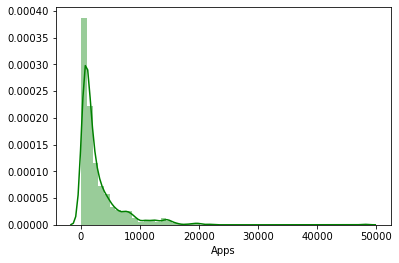

BoxPlot of Apps
----------------------------------------------------------------------------


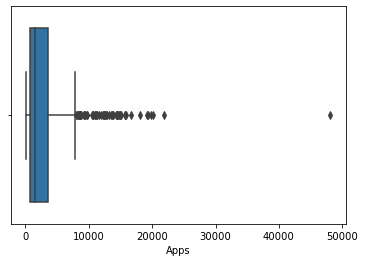

Description of Accept
----------------------------------------------------------------------------
count      777.000000
mean      2018.804376
std       2451.113971
min         72.000000
25%        604.000000
50%       1110.000000
75%       2424.000000
max      26330.000000
Name: Accept, dtype: float64 Distribution of Accept
----------------------------------------------------------------------------


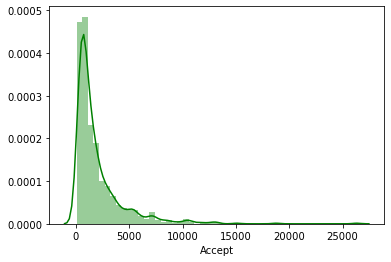

BoxPlot of Accept
----------------------------------------------------------------------------


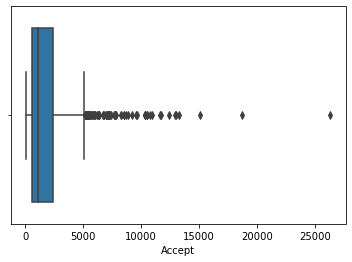

Description of Enroll
----------------------------------------------------------------------------
count     777.000000
mean      779.972973
std       929.176190
min        35.000000
25%       242.000000
50%       434.000000
75%       902.000000
max      6392.000000
Name: Enroll, dtype: float64 Distribution of Enroll
----------------------------------------------------------------------------


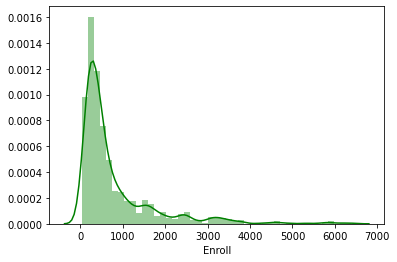

BoxPlot of Enroll
----------------------------------------------------------------------------


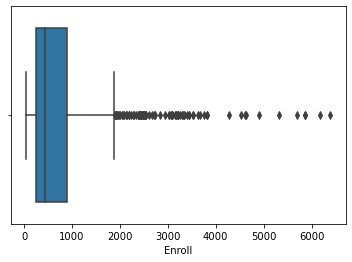

Description of Top10perc
----------------------------------------------------------------------------
count    777.000000
mean      27.558559
std       17.640364
min        1.000000
25%       15.000000
50%       23.000000
75%       35.000000
max       96.000000
Name: Top10perc, dtype: float64 Distribution of Top10perc
----------------------------------------------------------------------------


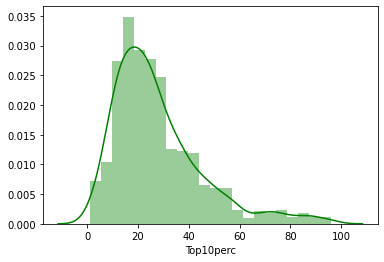

BoxPlot of Top10perc
----------------------------------------------------------------------------


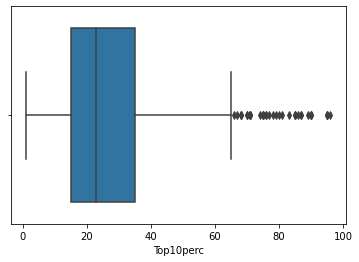

Description of Top25perc
----------------------------------------------------------------------------
count    777.000000
mean      55.796654
std       19.804778
min        9.000000
25%       41.000000
50%       54.000000
75%       69.000000
max      100.000000
Name: Top25perc, dtype: float64 Distribution of Top25perc
----------------------------------------------------------------------------


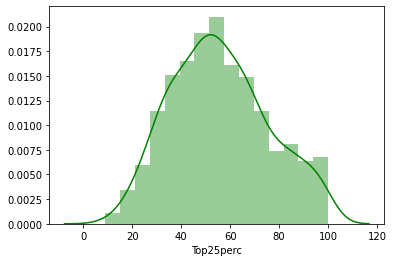

BoxPlot of Top25perc
----------------------------------------------------------------------------


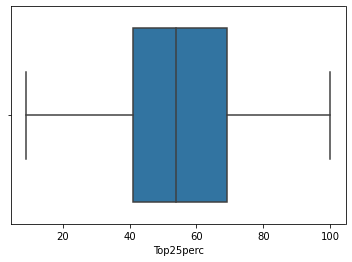

Description of F.Undergrad
----------------------------------------------------------------------------
count      777.000000
mean      3699.907336
std       4850.420531
min        139.000000
25%        992.000000
50%       1707.000000
75%       4005.000000
max      31643.000000
Name: F.Undergrad, dtype: float64 Distribution of F.Undergrad
----------------------------------------------------------------------------


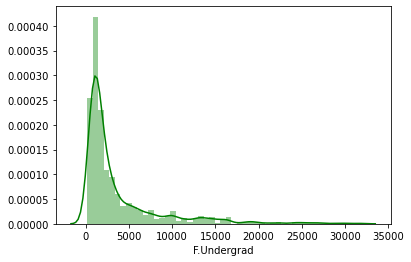

BoxPlot of F.Undergrad
----------------------------------------------------------------------------


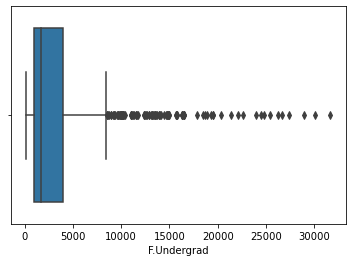

Description of P.Undergrad
----------------------------------------------------------------------------
count      777.000000
mean       855.298584
std       1522.431887
min          1.000000
25%         95.000000
50%        353.000000
75%        967.000000
max      21836.000000
Name: P.Undergrad, dtype: float64 Distribution of P.Undergrad
----------------------------------------------------------------------------


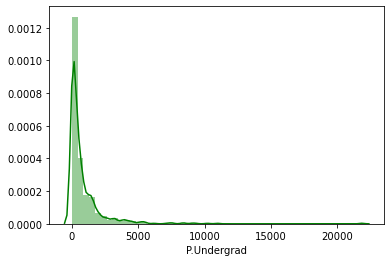

BoxPlot of P.Undergrad
----------------------------------------------------------------------------


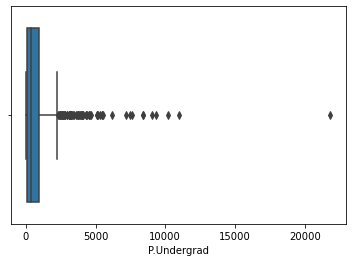

Description of Outstate
----------------------------------------------------------------------------
count      777.000000
mean     10440.669241
std       4023.016484
min       2340.000000
25%       7320.000000
50%       9990.000000
75%      12925.000000
max      21700.000000
Name: Outstate, dtype: float64 Distribution of Outstate
----------------------------------------------------------------------------


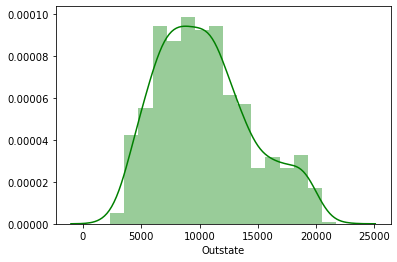

BoxPlot of Outstate
----------------------------------------------------------------------------


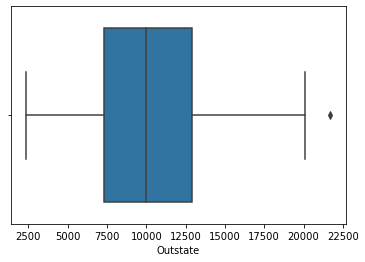

Description of Room.Board
----------------------------------------------------------------------------
count     777.000000
mean     4357.526384
std      1096.696416
min      1780.000000
25%      3597.000000
50%      4200.000000
75%      5050.000000
max      8124.000000
Name: Room.Board, dtype: float64 Distribution of Room.Board
----------------------------------------------------------------------------


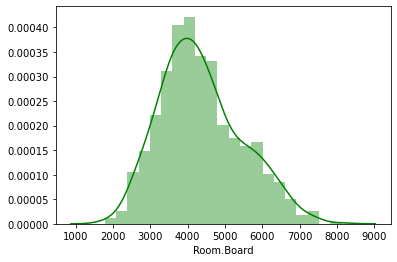

BoxPlot of Room.Board
----------------------------------------------------------------------------


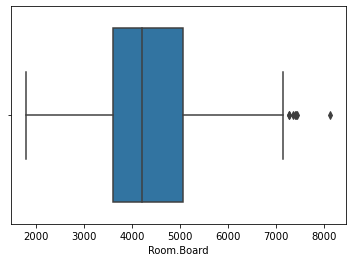

Description of Books
----------------------------------------------------------------------------
count     777.000000
mean      549.380952
std       165.105360
min        96.000000
25%       470.000000
50%       500.000000
75%       600.000000
max      2340.000000
Name: Books, dtype: float64 Distribution of Books
----------------------------------------------------------------------------


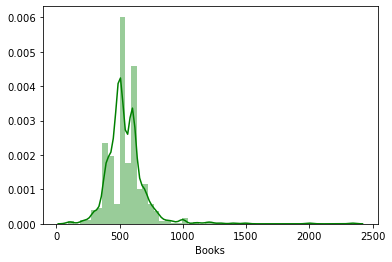

BoxPlot of Books
----------------------------------------------------------------------------


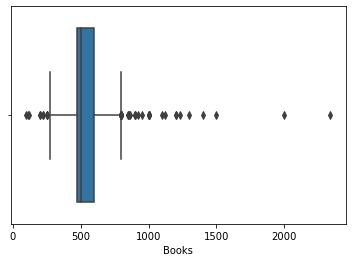

Description of Personal
----------------------------------------------------------------------------
count     777.000000
mean     1340.642214
std       677.071454
min       250.000000
25%       850.000000
50%      1200.000000
75%      1700.000000
max      6800.000000
Name: Personal, dtype: float64 Distribution of Personal
----------------------------------------------------------------------------


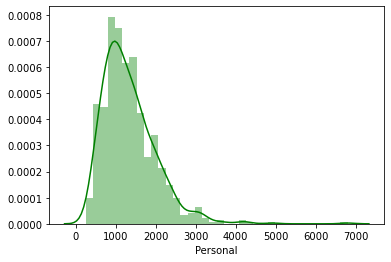

BoxPlot of Personal
----------------------------------------------------------------------------


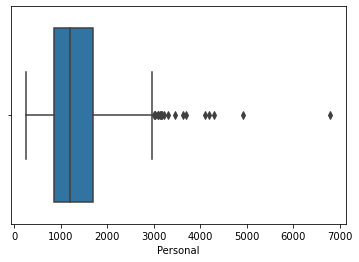

Description of PhD
----------------------------------------------------------------------------
count    777.000000
mean      72.660232
std       16.328155
min        8.000000
25%       62.000000
50%       75.000000
75%       85.000000
max      103.000000
Name: PhD, dtype: float64 Distribution of PhD
----------------------------------------------------------------------------


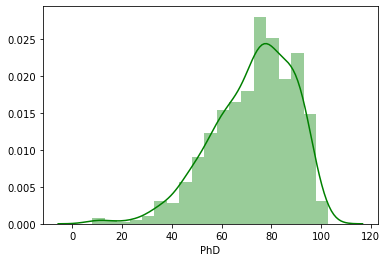

BoxPlot of PhD
----------------------------------------------------------------------------


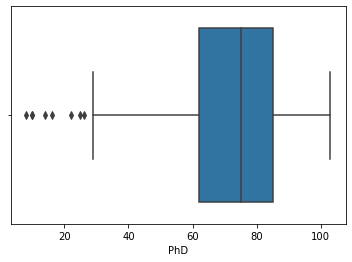

Description of Terminal
----------------------------------------------------------------------------
count    777.000000
mean      79.702703
std       14.722359
min       24.000000
25%       71.000000
50%       82.000000
75%       92.000000
max      100.000000
Name: Terminal, dtype: float64 Distribution of Terminal
----------------------------------------------------------------------------


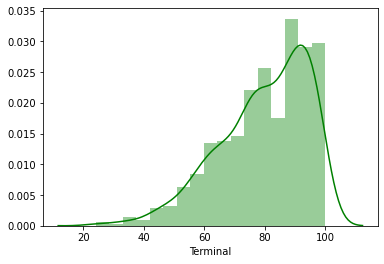

BoxPlot of Terminal
----------------------------------------------------------------------------


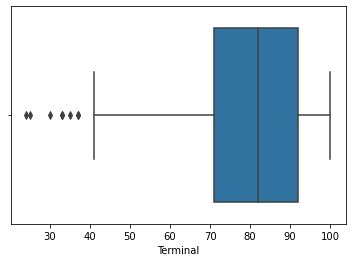

Description of S.F.Ratio
----------------------------------------------------------------------------
count    777.000000
mean      14.089704
std        3.958349
min        2.500000
25%       11.500000
50%       13.600000
75%       16.500000
max       39.800000
Name: S.F.Ratio, dtype: float64 Distribution of S.F.Ratio
----------------------------------------------------------------------------


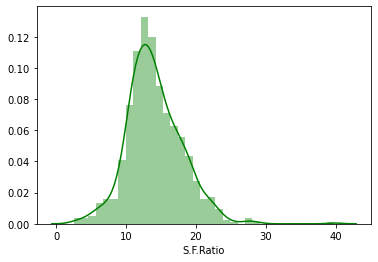

BoxPlot of S.F.Ratio
----------------------------------------------------------------------------


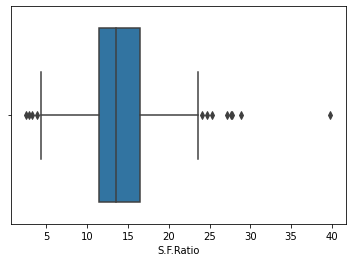

Description of perc.alumni
----------------------------------------------------------------------------
count    777.000000
mean      22.743887
std       12.391801
min        0.000000
25%       13.000000
50%       21.000000
75%       31.000000
max       64.000000
Name: perc.alumni, dtype: float64 Distribution of perc.alumni
----------------------------------------------------------------------------


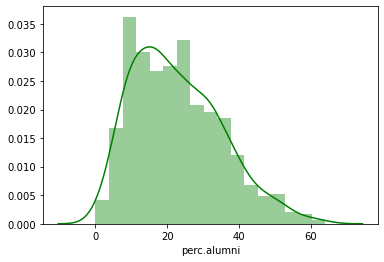

BoxPlot of perc.alumni
----------------------------------------------------------------------------


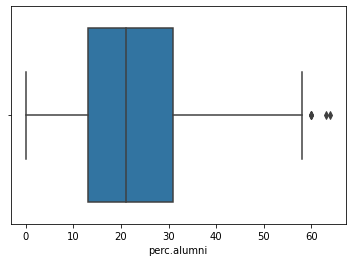

Description of Expend
----------------------------------------------------------------------------
count      777.000000
mean      9660.171171
std       5221.768440
min       3186.000000
25%       6751.000000
50%       8377.000000
75%      10830.000000
max      56233.000000
Name: Expend, dtype: float64 Distribution of Expend
----------------------------------------------------------------------------


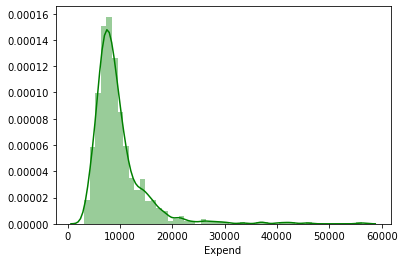

BoxPlot of Expend
----------------------------------------------------------------------------


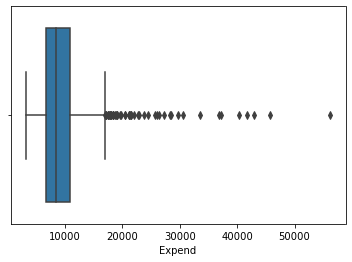

Description of Grad.Rate
----------------------------------------------------------------------------
count    777.00000
mean      65.46332
std       17.17771
min       10.00000
25%       53.00000
50%       65.00000
75%       78.00000
max      118.00000
Name: Grad.Rate, dtype: float64 Distribution of Grad.Rate
----------------------------------------------------------------------------


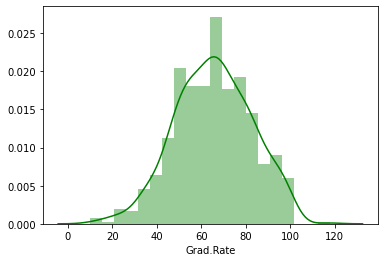

BoxPlot of Grad.Rate
----------------------------------------------------------------------------


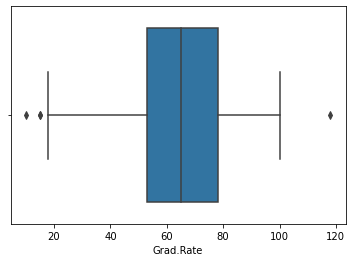

In [13]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

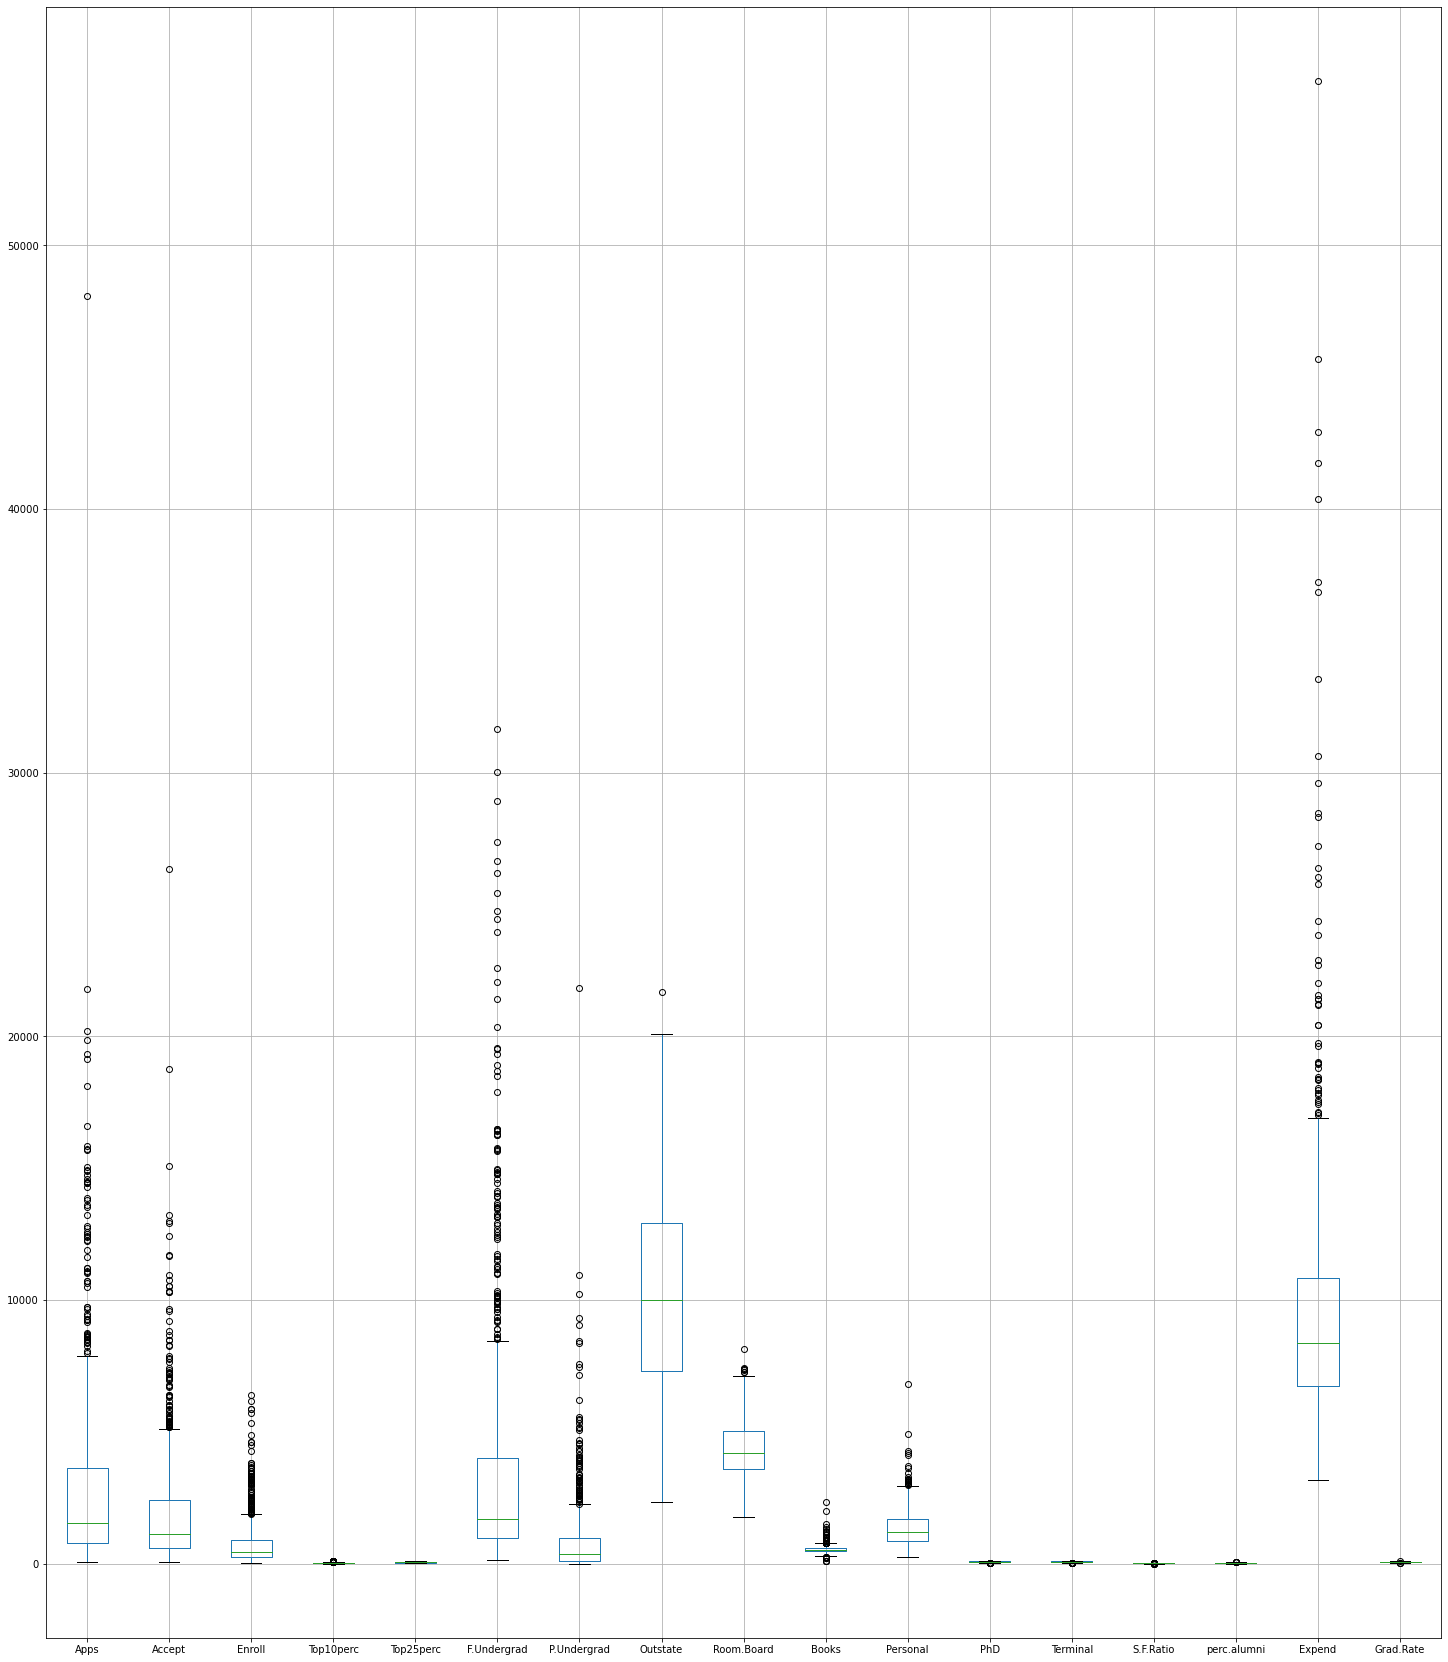

In [14]:
plt.subplots(figsize=(25,30))
df.boxplot(figsize=(25,20))

### Univariate analysis of Categorical variables

In [15]:
arr=df.Names.unique()
arr.shape

(777,)

Basically the University names have 777 unique values (Categorical). So, there is no scope of any analysis.

### Bivariate analysis

<font color=black>
    
#### Bivariate analysis is performed to understand interactions between different fields in the dataset (or) finding interactions between variables more than 2
#### ex: Heatmap etc..

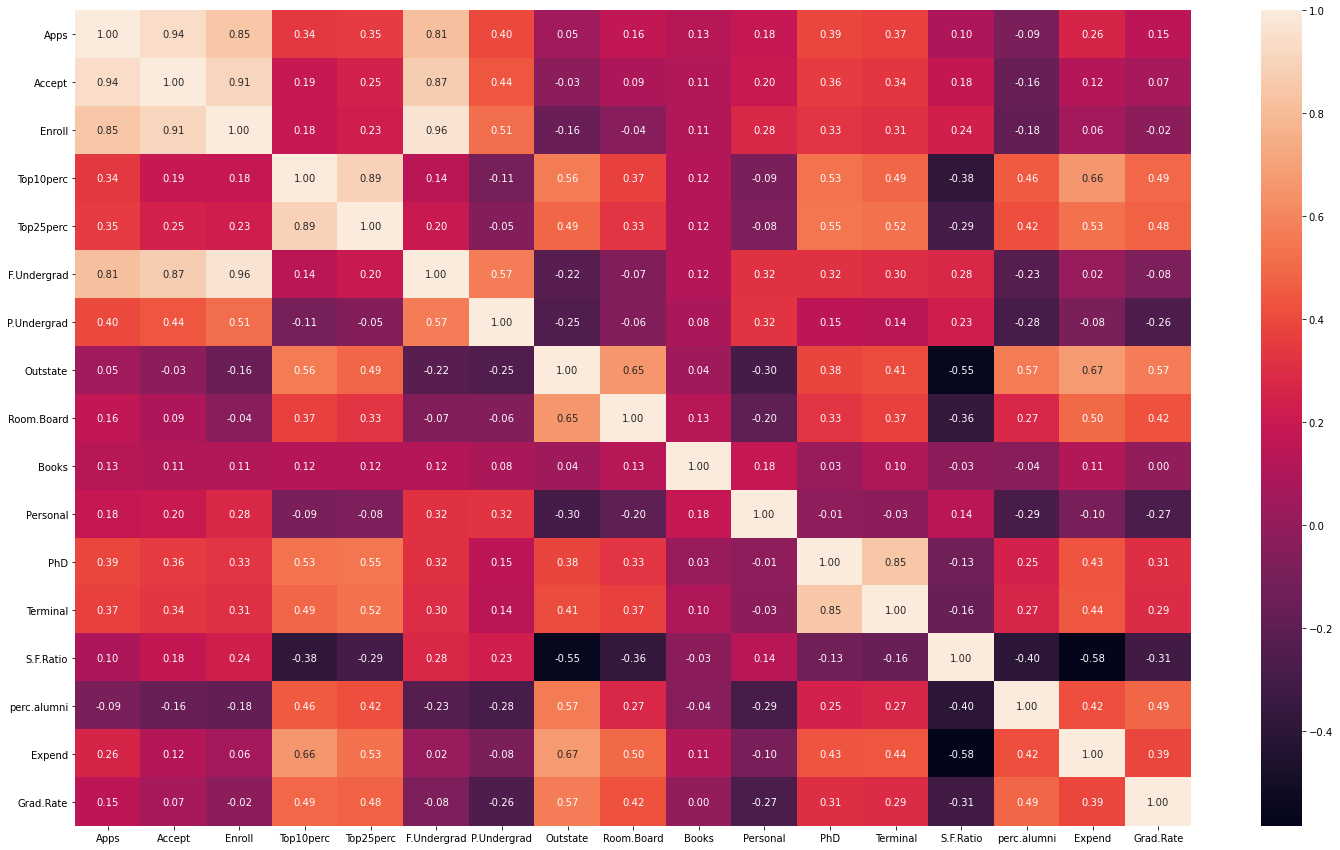

In [16]:
corr = df.corr(method='pearson')
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df_num.corr(), annot=True,fmt='.2f')
plt.show()

### Outlier Treatment

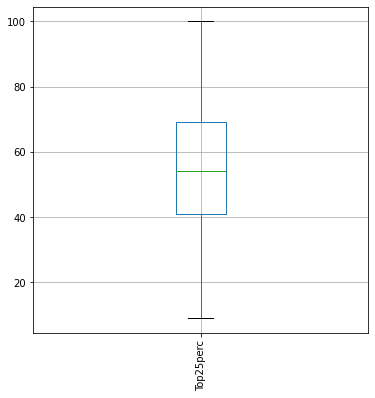

In [17]:
no_outlier = ['Top25perc']
df[no_outlier].boxplot(figsize=(6,6))
plt.xticks(rotation=90)
plt.show()

['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']
329.80000000000007 776.0 3624.0 11066.199999999995 <built-in function min> <built-in function max>
272.40000000000003 604.0 2424.0 6979.199999999997 <built-in function min> <built-in function max>
118.6 242.0 902.0 2756.9999999999936 <built-in function min> <built-in function max>
7.0 15.0 35.0 65.19999999999993 <built-in function min> <built-in function max>
25.800000000000004 41.0 69.0 93.0 <built-in function min> <built-in function max>
509.79999999999995 992.0 4005.0 14477.799999999988 <built-in function min> <built-in function max>
20.0 95.0 967.0 3303.599999999994 <built-in function min> <built-in function max>
4601.6 7320.0 12925.0 18497.999999999996 <built-in function min> <built-in function max>
2735.8 3597.0 5050.0 6381.999999999999 <built-in function min> <built-in function ma

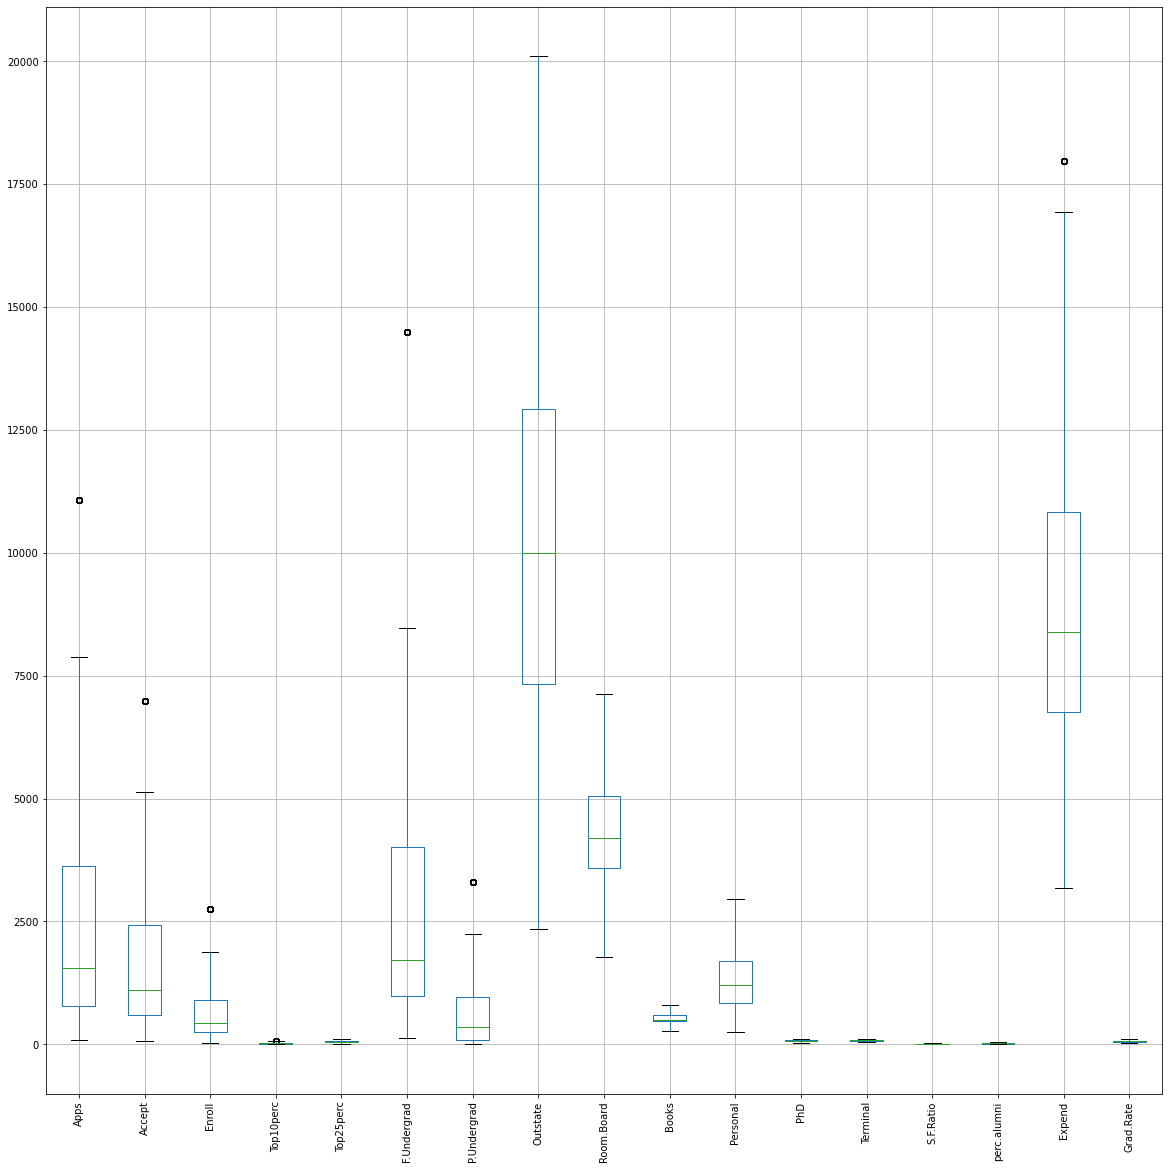

In [18]:
df_no_outlier=df.drop(['Names'],axis=1) # Deleting the 'Names' column for outlier treatment and making a different dataframe.

def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Calculating maximum threshold
    print(q5,q25,q75,dt,min,max)
    #Capping outliers
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

outlier_list = [x for x in df_no_outlier.columns ]

print(outlier_list)

for i in df_no_outlier[outlier_list]:    
    df_no_outlier[i]=treat_outlier(df_no_outlier[i])

    
df_no_outlier.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

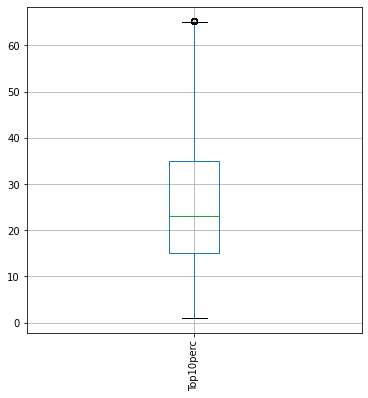

In [19]:
check=['Top10perc']
df_no_outlier[check].boxplot(figsize=(6,6))
plt.xticks(rotation=90)
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Observations

- There are 17 numeric fields in the data
    
- There is only 1 catagorical variable "Names"

- Most of the numerical variable have a very big range (Max. - Min.)

- There is no missing value in the dataset

- There is no duplicate values in any variable

- Distribution of all the data **except** 'Top25perc' are highly skewed and have outliers
    
- From the Bivariate analysis, below are the observations. 
    
    1) There is a high correlation (> 0.85) among Application and Acceptance of application and enrollment of new students.
    
    2) High correlation between Application and Acceptance of application means that there is very few rejections. Also, whoever got acceptance of application got final admission.
    
    3) High correlation between Fulltime undergraduate and Appications or Acceptance of application or enrollment means most of the students are going to attend undergraduate course.
    
    4) High correlation between faculties with PhD. and terminal degree.
    
    5) There is a high **negative** correlation between SF ratio and Expend which is very obvious and logical. More the ratio, less is the instructional expenditure per student.
    
    6) There is a high **negative** correlation between SF ratio and Out of state students who is taking tution.
    
    
- All the outliers are treated with application IQR calculation.

### Question 2.2) Scale the variables and write the inference for using the type of scaling function for this case study. 

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Answer 2.2:
    
**Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. Since, the range of values of data vary widely, it is a necessary step in data preprocessing while using PCA.**

**In this method, we convert variables with different scales of measurements into a single scale. There are several methods such as StandardScaler (Zscore), Minmaxscaler, Logarithmic scaler etc. in this present case, we will use Zscore technique which is most widely used.  Moreover, another prominent reason is the Principal Component Analysis (PCA), where we usually prefer standardization over Min-Max scaling since we are interested in the components that maximize the variance.**

**StandardScaler (Zscore) normalizes the data using the formula (x-mean)/standard deviation.** 
    

**We will be doing this only for the numerical variables.**

In [20]:
from scipy.stats import zscore
df_new=df_no_outlier.apply(zscore)
df_new.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.383829,-0.353198,-0.035012,-0.247034,-0.191827,-0.179951,-0.220908,-0.747173,-0.976849,-0.807146,1.534067,-0.189281,-0.135735,1.107193,-0.877388,-0.621979,-0.327324
1,-0.215156,0.003214,-0.302696,-0.695834,-1.353911,-0.225740,0.513397,0.459655,1.959843,1.912681,0.325766,-2.826575,-1.917777,-0.502762,-0.547691,0.361374,-0.564340
2,-0.458225,-0.422730,-0.528115,-0.311148,-0.292878,-0.599082,-0.687032,0.202830,-0.557322,-1.260450,-0.252493,-1.282793,-0.984326,-0.311750,0.606247,-0.144125,-0.682848
3,-0.782423,-0.807984,-0.782992,2.125195,1.677612,-0.718316,-0.725344,0.629209,1.027560,-0.807146,-0.753075,1.225853,1.207869,-1.730694,1.183216,2.462296,-0.386578
4,-0.854253,-0.912539,-0.888017,-0.695834,-0.596031,-0.777479,0.132410,-0.717252,-0.212377,2.054112,0.325766,0.196665,-0.560031,-0.584624,-1.701629,0.472798,-1.690169


### Question 2.3) Comment on the comparison between covariance and the correlation matrix.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Answer 2.3:
    


In [21]:
df.corr()  ## df is the original dataframe

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


In [22]:
df_new.corr()    ## df_new is the scaled dataframe

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.933721,0.869927,0.323850,0.362402,0.816797,0.501112,0.063205,0.182724,0.232991,0.229238,0.446195,0.416730,0.114067,-0.100481,0.254206,0.146968
Accept,0.933721,1.000000,0.921169,0.220338,0.267999,0.870428,0.556221,-0.014237,0.110183,0.213630,0.256020,0.407037,0.383561,0.182299,-0.162400,0.166054,0.069452
Enroll,0.869927,0.921169,1.000000,0.167349,0.224570,0.947269,0.641672,-0.160551,-0.037202,0.213123,0.347087,0.360814,0.335650,0.267559,-0.213467,0.057268,-0.040492
Top10perc,0.323850,0.220338,0.167349,1.000000,0.913717,0.103675,-0.146407,0.563581,0.355060,0.153943,-0.120176,0.546490,0.510105,-0.382899,0.450047,0.662904,0.498954
Top25perc,0.362402,0.267999,0.224570,0.913717,1.000000,0.168115,-0.068976,0.490749,0.329582,0.171750,-0.088003,0.554801,0.527806,-0.290843,0.412259,0.576125,0.486738
F.Undergrad,0.816797,0.870428,0.947269,0.103675,0.168115,1.000000,0.682826,-0.233126,-0.079608,0.202379,0.364438,0.331159,0.311108,0.308149,-0.270638,0.000221,-0.103195
P.Undergrad,0.501112,0.556221,0.641672,-0.146407,-0.068976,0.682826,1.000000,-0.335734,-0.074810,0.136037,0.331455,0.150676,0.142498,0.350515,-0.393735,-0.166944,-0.276314
Outstate,0.063205,-0.014237,-0.160551,0.563581,0.490749,-0.233126,-0.335734,1.000000,0.659314,-0.004340,-0.330512,0.401629,0.419211,-0.578969,0.562757,0.773354,0.580301
Room.Board,0.182724,0.110183,-0.037202,0.355060,0.329582,-0.079608,-0.074810,0.659314,1.000000,0.107052,-0.226698,0.352936,0.383446,-0.382253,0.272121,0.581051,0.430189
Books,0.232991,0.213630,0.213123,0.153943,0.171750,0.202379,0.136037,-0.004340,0.107052,1.000000,0.237367,0.152585,0.168940,-0.003635,-0.048824,0.145813,-0.003494


In [23]:
cov_matrix = np.cov(df_new.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866e+00  9.34924522e-01  8.71047851e-01  3.24267498e-01
   3.62868715e-01  8.17850066e-01  5.01757457e-01  6.32865674e-02
   1.82959147e-01  2.33291015e-01  2.29533091e-01  4.46769909e-01
   4.17266656e-01  1.14213807e-01 -1.00610235e-01  2.54533823e-01
   1.47156965e-01]
 [ 9.34924522e-01  1.00128866e+00  9.22355696e-01  2.20622220e-01
   2.68343861e-01  8.71549611e-01  5.56937826e-01 -1.42554840e-02
   1.10325234e-01  2.13905650e-01  2.56349672e-01  4.07561902e-01
   3.84055661e-01  1.82533467e-01 -1.62609751e-01  1.66268254e-01
   6.95416281e-02]
 [ 8.71047851e-01  9.22355696e-01  1.00128866e+00  1.67564256e-01
   2.24859762e-01  9.48490114e-01  6.42498582e-01 -1.60758239e-01
  -3.72502918e-02  2.13398113e-01  3.47533881e-01  3.61278980e-01
   3.36082067e-01  2.67904002e-01 -2.13741732e-01  5.73414255e-02
  -4.05441513e-02]
 [ 3.24267498e-01  2.20622220e-01  1.67564256e-01  1.00128866e+00
   9.14894801e-01  1.03808804e-01 -1.46595772e-01  5.64307196e-

Here, We have computed 3 matrices:

1. Correlation matrix on unscaled/unstandardized data

2. Correlation matrix on scaled/standardized data

3. Covariance matrix on scaled/standardized data




Here, it is observed that the results are similar. The similarity of results (fractional differences) reinforces the understanding that correlation matrix is same as scaled derivative of the covariance matrix. Any computation on these matrices will yield the same or similar results.

### Question 2.4) Check the dataset for outliers before and after scaling. Draw your inferences from this exercise.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Answer 2.4:

#### Checking the outliers before scaling (on the original dataframe)

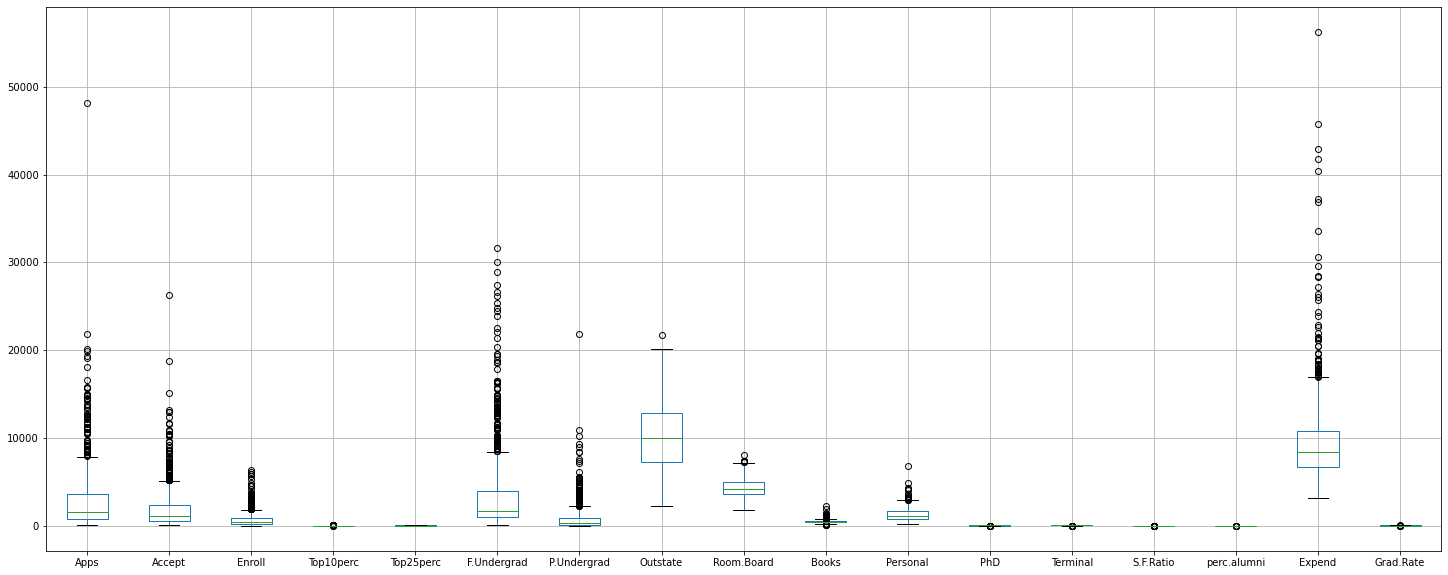

In [24]:
plt.subplots(figsize=(25,10))
df.boxplot(figsize=(25,10))

In [25]:
df_temp=df.drop(['Names'],axis=1)
df_temp=df_temp.apply(zscore)
df_temp.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


#### Checking the outliers after scaling (on the altered dataframe)

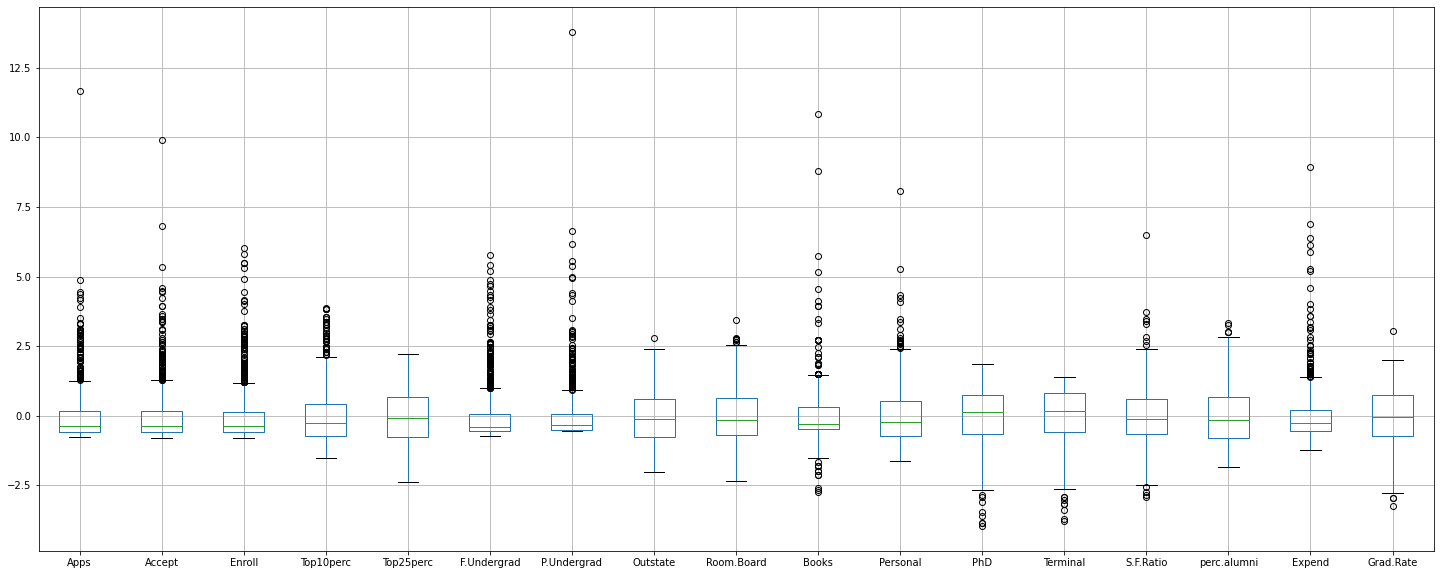

In [26]:
plt.subplots(figsize=(25,10))
df_temp.boxplot(figsize=(25,10))

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea">
    
The following are the inferences from the above observations,
    
1. In the original dataset, the outlier values were very high compared to mean values, specially for the fields such as Apps,	Accept,	Enroll,	F.Undergrad, P.Undergrad, Books, Expend etc. The maximum range of values considering all the variables lies in 0 to apprx. 60000. But after scaling, we have seen that the range is somewhere between -5.0 to 15.0 (approx.). So, scaling brings in an uniformity in the variable values.
    
2. It is observed that in the unscaled dataset, the variable values were always positive, whereas, in the scaled dataset, some of the outliers are negative. That is because of the use of scaling technic, zscore scaling in this case. Use of other scalers may not yield negative values.
    
3. One needs to be careful while using different scaling methods as it may sometimes change the distribution of data. But it is not evident in our case, where the data have been scaled with 2 different scalers. (this clue is taken from a Google discussion forum).

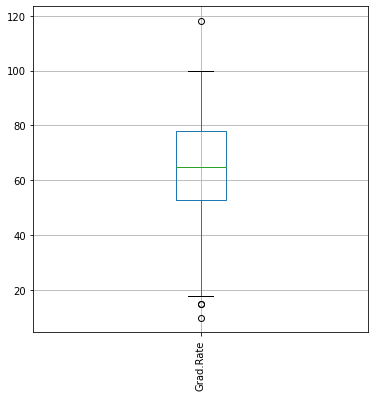

In [27]:
check=['Grad.Rate']
df[check].boxplot(figsize=(6,6))
plt.xticks(rotation=90)
plt.show()

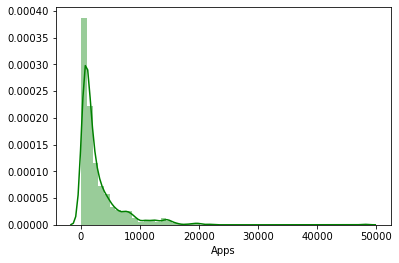

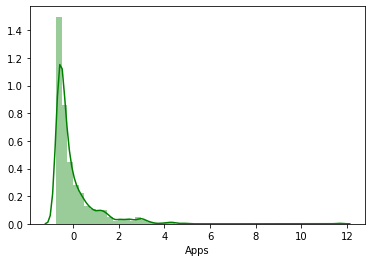

In [28]:
sns.distplot(df['Apps'], kde=True, color='g');
plt.show()

sns.distplot(df_temp['Apps'], kde=True, color='g')
plt.show()

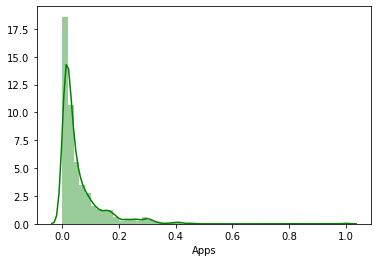

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Apps'] = scaler.fit_transform(df[['Apps']])

sns.distplot(df['Apps'], kde=True, color='g');
plt.show()

### Question 2.5) Build the covariance matrix, eigenvalues, and eigenvector.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Answer 2.5:



###### Covariance Matrix

In [30]:
cov_matrix = np.cov(df_new.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866e+00  9.34924522e-01  8.71047851e-01  3.24267498e-01
   3.62868715e-01  8.17850066e-01  5.01757457e-01  6.32865674e-02
   1.82959147e-01  2.33291015e-01  2.29533091e-01  4.46769909e-01
   4.17266656e-01  1.14213807e-01 -1.00610235e-01  2.54533823e-01
   1.47156965e-01]
 [ 9.34924522e-01  1.00128866e+00  9.22355696e-01  2.20622220e-01
   2.68343861e-01  8.71549611e-01  5.56937826e-01 -1.42554840e-02
   1.10325234e-01  2.13905650e-01  2.56349672e-01  4.07561902e-01
   3.84055661e-01  1.82533467e-01 -1.62609751e-01  1.66268254e-01
   6.95416281e-02]
 [ 8.71047851e-01  9.22355696e-01  1.00128866e+00  1.67564256e-01
   2.24859762e-01  9.48490114e-01  6.42498582e-01 -1.60758239e-01
  -3.72502918e-02  2.13398113e-01  3.47533881e-01  3.61278980e-01
   3.36082067e-01  2.67904002e-01 -2.13741732e-01  5.73414255e-02
  -4.05441513e-02]
 [ 3.24267498e-01  2.20622220e-01  1.67564256e-01  1.00128866e+00
   9.14894801e-01  1.03808804e-01 -1.46595772e-01  5.64307196e-

##### Eigen values and Eigen vector

In [31]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', eig_vals)
print('\n')
print('Eigen Vectors \n %s', eig_vecs)


 Eigen Values 
 %s [5.64307841 4.82973672 1.10030644 0.9966849  0.8977433  0.76549205
 0.58709565 0.55450358 0.44319291 0.38222641 0.24563729 0.03891348
 0.05597992 0.07466871 0.12376406 0.13603844 0.14684496]


Eigen Vectors 
 %s [[ 2.42671239e-01  3.24930495e-01  9.77100175e-02 -1.02559773e-01
   2.28743180e-01 -4.76414519e-02  1.23782113e-02 -3.41030317e-02
  -1.84655032e-01 -1.34049566e-01 -6.79408155e-02 -1.51051724e-01
   5.73869368e-01  2.54721171e-02  3.50002377e-01 -4.76265776e-01
  -2.73993248e-02]
 [ 2.08095876e-01  3.57755851e-01  1.25144023e-01 -1.21914245e-01
   2.02792107e-01 -3.31338141e-02 -1.41529768e-03 -1.02521665e-01
  -1.89697047e-01 -1.23207526e-01 -2.86891699e-02  4.52766958e-01
  -6.43625404e-01 -4.08143058e-02  1.12837998e-01 -2.08677137e-01
  -1.27528369e-01]
 [ 1.64564266e-01  3.95824297e-01  9.44419384e-02 -1.42497171e-02
   1.72168365e-01  3.89761143e-02  7.92830517e-03 -1.34762063e-01
  -5.20184210e-02 -4.79563882e-02 -2.29745788e-02 -7.50067816e-01
  -2

### Question 2.6) Write the explicit form of the first PC (in terms of Eigen Vectors).

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Answer 2.6:



In [32]:
eig_vecs.T

array([[ 2.42671239e-01,  2.08095876e-01,  1.64564266e-01,
         3.44633526e-01,  3.37858398e-01,  1.34287678e-01,
         1.45128920e-02,  2.97304568e-01,  2.51192093e-01,
         9.35681745e-02, -4.84668755e-02,  3.24667558e-01,
         3.20509921e-01, -1.78476677e-01,  1.98617542e-01,
         3.40157000e-01,  2.48644778e-01],
       [ 3.24930495e-01,  3.57755851e-01,  3.95824297e-01,
        -7.53900839e-02, -3.67211412e-02,  4.06243667e-01,
         3.54916637e-01, -2.37362415e-01, -1.23789047e-01,
         1.06015391e-01,  2.35469217e-01,  7.06517594e-02,
         5.96664001e-02,  2.47834896e-01, -2.43261851e-01,
        -1.35747859e-01, -1.60607758e-01],
       [ 9.77100175e-02,  1.25144023e-01,  9.44419384e-02,
        -7.23866450e-02, -4.63368319e-02,  8.72397333e-02,
         3.86964803e-02,  2.05908405e-02, -2.60693995e-02,
        -7.13557985e-01, -5.21834336e-01,  5.72580979e-02,
         3.74577785e-02,  2.58375559e-01,  1.09906654e-01,
        -1.72929690e-01,  2.3

In [33]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 8 PCA dimensions (dimensionality reduction from 17 to 8)

pca = PCA(n_components=8)
data_reduced = pca.fit_transform(df_new)
data_reduced.transpose()

array([[-1.73690056, -1.59813592, -1.54279982, ..., -0.67443642,
         6.6604879 , -0.62211979],
       [ 0.78652261, -0.33203965, -1.37926813, ..., -0.14322332,
        -1.08947694,  0.63056961],
       [ 0.09133408,  2.12900893, -0.60248933, ...,  0.37331101,
         1.41458028, -1.31505501],
       ...,
       [-0.76561026,  1.36493321, -0.96560235, ...,  0.5305268 ,
        -0.67425069,  1.15220228],
       [ 0.87942597, -0.33734577, -0.17435831, ..., -1.4613828 ,
         1.2763392 ,  0.98241978],
       [ 0.97681144,  0.21922305, -0.3326253 , ..., -0.17052114,
         0.10179418,  0.43184083]])

In [34]:
pca.components_

array([[ 0.24267124,  0.20809588,  0.16456427,  0.34463353,  0.3378584 ,
         0.13428768,  0.01451289,  0.29730457,  0.25119209,  0.09356817,
        -0.04846688,  0.32466756,  0.32050992, -0.17847668,  0.19861754,
         0.340157  ,  0.24864478],
       [ 0.3249305 ,  0.35775585,  0.3958243 , -0.07539008, -0.03672114,
         0.40624367,  0.35491664, -0.23736241, -0.12378905,  0.10601539,
         0.23546922,  0.07065176,  0.0596664 ,  0.2478349 , -0.24326185,
        -0.13574786, -0.16060776],
       [-0.09771002, -0.12514402, -0.09444194,  0.07238665,  0.04633683,
        -0.08723973, -0.03869648, -0.02059084,  0.0260694 ,  0.71355799,
         0.52183434, -0.0572581 , -0.03745778, -0.25837556, -0.10990665,
         0.17292969, -0.23102815],
       [ 0.10255977,  0.12191424,  0.01424972, -0.37556323, -0.42787637,
         0.01461658,  0.20726537,  0.25385171,  0.56679378, -0.04727896,
        -0.10787843, -0.12347098, -0.07314694, -0.28302404, -0.22994443,
         0.22017626

##### We can represnt the First PC in the linear algebra form as below.

PC1 = 0.24267124*Apps+0.20809588*Accept+0.16456427*Enroll+0.34463353*Top10perc+0.3378584*Top25perc+0.13428768*F.Undergrad+0.01451289*P.Undergrad+0.29730457*Outstate+0.25119209*Room.Board+0.09356817*Books-0.04846688*Personal+0.32466756*PhD+0.32050992*Terminal-0.17847668*S.F.Ratio+0.19861754*perc.alumni+0.340157*Expend+0.2486447*Grad.Rate

### Question 2.7) Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate? Perform PCA and export the data of the Principal Component scores into a data frame.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Answer 2.7:

##### With the help of the following code, the following are the cumulative values of eigen values. The Cumulative % gives the percentage of variance accounted for by the n components. For example, the cumulative percentage for the second component is the sum of the percentage of variance for the first and second components. It helps in deciding the number of components by selecting the components which explained the high variance.

##### In our present case, we see that the first feature explains 33.15% of the variance within our data set while the first two explain 61.5% and so on. If we employ 8 features we can capture ~ 90% of the variance within the dataset. (90% is our assumption while one can go for 80% - 85% based on the situation and data set.)

##### In simple definition, Eigenvectors indicate the direction of the principal components. Each Eigenvector will correspond to an Eigenvalue, whose magnitude indicates how much of the data’s variability is explained by its Eigenvector. To get to the Principal components, we will multiply the original X, Y data by Eigenvectors.

In [35]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 33.15185743  61.52550945  67.98957029  73.84487717  79.11892366
  83.61602283  87.06508197  90.32266981  92.9263317   95.17182864
  96.61489423  97.47757639  98.27677262  99.00385952  99.44252192
  99.77139178 100.        ]


#### Visually we can observe that their is steep drop in variance explained with increase in number of PC's.
#### We will proceed with 8 components here assuming a requirement of 90% variation.

In [36]:
df_pca = pd.DataFrame(pca.components_,columns=list(df_new))
df_pca.shape
df_pca.head(10)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.242671,0.208096,0.164564,0.344634,0.337858,0.134288,0.014513,0.297305,0.251192,0.093568,-0.048467,0.324668,0.320510,-0.178477,0.198618,0.340157,0.248645
1,0.324930,0.357756,0.395824,-0.075390,-0.036721,0.406244,0.354917,-0.237362,-0.123789,0.106015,0.235469,0.070652,0.059666,0.247835,-0.243262,-0.135748,-0.160608
2,-0.097710,-0.125144,-0.094442,0.072387,0.046337,-0.087240,-0.038696,-0.020591,0.026069,0.713558,0.521834,-0.057258,-0.037458,-0.258376,-0.109907,0.172930,-0.231028
3,0.102560,0.121914,0.014250,-0.375563,-0.427876,0.014617,0.207265,0.253852,0.566794,-0.047279,-0.107878,-0.123471,-0.073147,-0.283024,-0.229944,0.220176,-0.074147
4,0.228743,0.202792,0.172168,0.145905,0.120537,0.115073,-0.132039,0.042968,-0.090207,-0.016630,0.062935,-0.547357,-0.585124,-0.226759,0.138310,0.028307,0.287880
5,0.047641,0.033134,-0.038976,-0.083767,-0.021492,-0.054996,-0.051645,-0.013967,0.257757,0.608724,-0.384138,-0.062174,-0.047922,0.442094,-0.005596,-0.238206,0.372585
6,-0.012378,0.001415,-0.007928,-0.258268,-0.234717,-0.027916,-0.093659,0.104399,0.125975,-0.139286,0.656949,0.096114,0.098447,0.174587,0.321858,-0.150524,0.463708
7,-0.034103,-0.102522,-0.134762,0.289095,0.336249,-0.122385,0.054191,0.023889,0.355686,-0.256097,0.251642,-0.047057,-0.116058,0.215538,-0.635277,-0.086414,0.162586


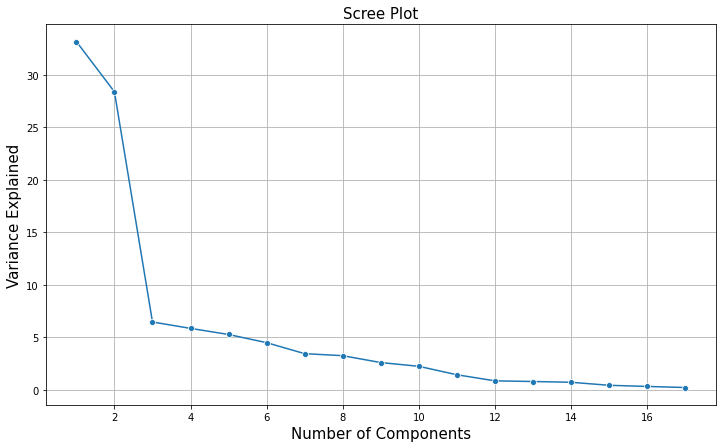

In [37]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

### Question 2.8) Mention the business implication of using the Principal Component Analysis for this case study. [Hint: Write Interpretations of the Principal Components Obtained]

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Answer 2.8:
    
#### We will check the  feature loadings for each principal components as below. We will be able to draw some inferences out of those loading data. 

In [38]:
from matplotlib.patches import Rectangle

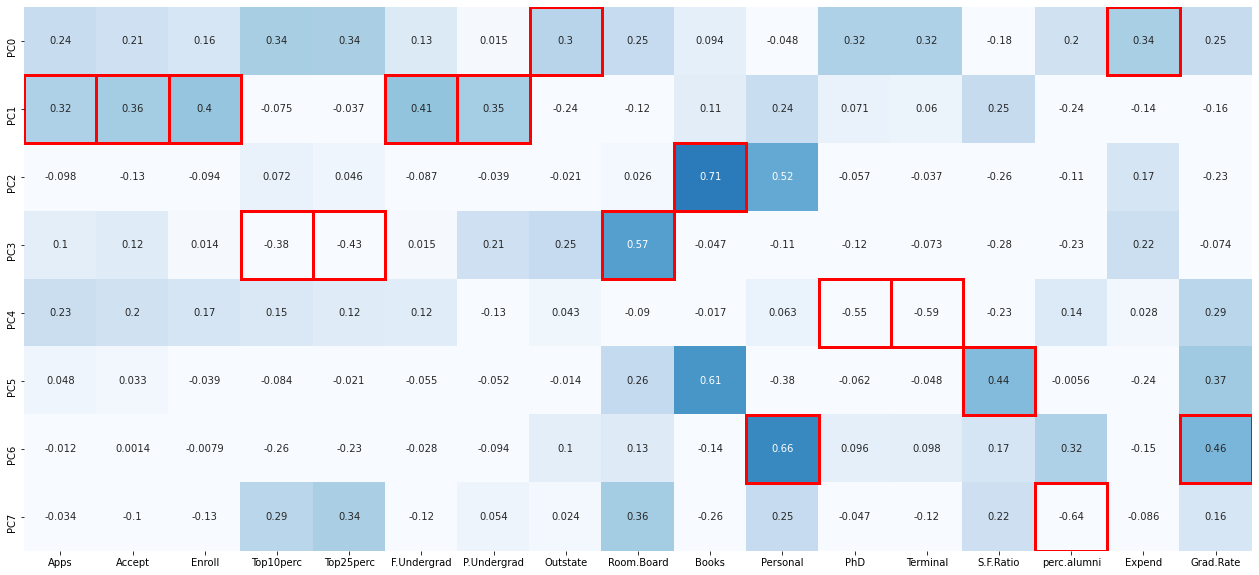

In [39]:
fig,ax = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC0','PC1','PC2','PC3','PC4','PC5','PC6','PC7'])

column_max = df_pca.abs().idxmax(axis=0)

for col, variable in enumerate(df_pca.columns):
    position = df_pca.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

1. We have seen that first component PC0 is more related to expenditures in academic instructions/teachings incurred by universities.So, one can relate PC0 to universities' academic related expenditure.  
2. The second component PC1 is related to new admissions and number of students.  
3. The third component PC2 is related to cost incurred by each student on books.
4. The fourth component PC3 is mostly related to cost of boarding per student.
5. The fifth component PC4 is related to educational degrees held by faculties.
6. The sixth component PC5 is related to student to faculty ratio.
7. The seventh component PC6 is mostly related to cost incurred by each student on personal belongings and also the graduation rate.
8. The eighth component PC7 is mostly related to Alum's donation.

So, with the help of this PCA we are able to capture most of the variables in 8 principal components for future analysis, thus reducing the overall dimension of the dataset.